In [1]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [2]:
counts = pd.read_csv('Soybean_count_table_idp7.csv')
counts

,Geneid,Control_T7_R1,Control_T7_R2,Control_T7_R3,Control_T7_R4,Alternaria_T7_R1,Alternaria_T7_R2,Alternaria_T7_R3,Alternaria_T7_R4
0,LOC100808170,1,0,0,0,0,1,0,1
1,LOC102661143,1,0,0,0,2,1,2,0
2,LOC121174904,0,0,0,0,0,0,0,0
3,LOC106794262,0,0,0,0,0,0,0,0
4,LOC100781438,2,4,6,2,2,4,3,0
...,...,...,...,...,...,...,...,...,...
54527,I638_mgp007,0,0,0,0,0,0,0,0
54528,I638_mgp006,0,0,0,0,0,0,0,0
54529,I638_mgp005,0,0,0,0,0,0,0,0
54530,I638_mgp004,0,0,0,0,0,0,0,0


In [3]:
counts = counts.set_index('Geneid')
counts

,Control_T7_R1,Control_T7_R2,Control_T7_R3,Control_T7_R4,Alternaria_T7_R1,Alternaria_T7_R2,Alternaria_T7_R3,Alternaria_T7_R4
Geneid,,,,,,,,
LOC100808170,1,0,0,0,0,1,0,1
LOC102661143,1,0,0,0,2,1,2,0
LOC121174904,0,0,0,0,0,0,0,0
LOC106794262,0,0,0,0,0,0,0,0
LOC100781438,2,4,6,2,2,4,3,0
...,...,...,...,...,...,...,...,...
I638_mgp007,0,0,0,0,0,0,0,0
I638_mgp006,0,0,0,0,0,0,0,0
I638_mgp005,0,0,0,0,0,0,0,0


In [4]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,Control_T7_R1,Control_T7_R2,Control_T7_R3,Control_T7_R4,Alternaria_T7_R1,Alternaria_T7_R2,Alternaria_T7_R3,Alternaria_T7_R4
Geneid,,,,,,,,
LOC100808170,1,0,0,0,0,1,0,1
LOC102661143,1,0,0,0,2,1,2,0
LOC100781438,2,4,6,2,2,4,3,0
LOC100788220,2,1,2,3,1,5,3,1
LOC100779643,4,0,5,1,4,6,6,1
...,...,...,...,...,...,...,...,...
I638_mgp020,0,0,0,1,1,0,0,0
I638_mgp019,0,0,2,0,0,0,1,0
I638_mgp018,2,1,1,1,1,0,0,1


In [5]:
counts = counts.T
counts

Geneid,LOC100808170,LOC102661143,LOC100781438,LOC100788220,LOC100779643,LOC100499919,LOC100792431,LOC548054,LOC100795420,LOC100810680,...,I638_mgr002,I638_mgr001,I638_mgp023,I638_mgp021,I638_mgp060,I638_mgp020,I638_mgp019,I638_mgp018,I638_mgp014,I638_mgp009
Control_T7_R1,1,1,2,2,4,2,4,33,1,1,...,0,48,0,0,0,0,0,2,0,0
Control_T7_R2,0,0,4,1,0,9,13,49,1,2,...,4,89,0,0,3,0,0,1,0,0
Control_T7_R3,0,0,6,2,5,12,10,67,0,3,...,2,92,1,1,0,0,2,1,1,0
Control_T7_R4,0,0,2,3,1,9,6,41,1,6,...,0,100,0,0,0,1,0,1,0,1
Alternaria_T7_R1,0,2,2,1,4,11,6,31,2,1,...,0,67,0,0,0,1,0,1,0,1
Alternaria_T7_R2,1,1,4,5,6,10,3,26,1,6,...,1,53,0,0,1,0,0,0,0,0
Alternaria_T7_R3,0,2,3,3,6,14,4,22,1,4,...,0,100,0,1,0,0,1,0,0,1
Alternaria_T7_R4,1,0,0,1,1,4,2,9,0,5,...,2,15,0,0,0,0,0,1,0,0


In [6]:
metadata = pd.DataFrame(zip(counts.index, ['C7','C7','C7','C7', 'AL7', 'AL7', 'AL7', 'AL7']),
                        columns = ['Sample', 'Condition'])

In [7]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Control_T7_R1,C7
Control_T7_R2,C7
Control_T7_R3,C7
Control_T7_R4,C7
Alternaria_T7_R1,AL7
Alternaria_T7_R2,AL7
Alternaria_T7_R3,AL7
Alternaria_T7_R4,AL7


In [8]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition",
    refit_cooks=True,
    inference=inference,
)

In [9]:
dds

AnnData object with n_obs × n_vars = 8 × 33753
    obs: 'Condition'
    obsm: 'design_matrix'

In [10]:
dds.obs

,Condition
Sample,
Control_T7_R1,C7
Control_T7_R2,C7
Control_T7_R3,C7
Control_T7_R4,C7
Alternaria_T7_R1,AL7
Alternaria_T7_R2,AL7
Alternaria_T7_R3,AL7
Alternaria_T7_R4,AL7


In [11]:
dds.var

""
Geneid
LOC100808170
LOC102661143
LOC100781438
LOC100788220
LOC100779643
...
I638_mgp020
I638_mgp019
I638_mgp018


In [12]:
dds.X

array([[1, 1, 2, ..., 2, 0, 0],
       [0, 0, 4, ..., 1, 0, 0],
       [0, 0, 6, ..., 1, 1, 0],
       ...,
       [1, 1, 4, ..., 0, 0, 0],
       [0, 2, 3, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0]])

In [13]:
dds.X.shape

(8, 33753)

In [14]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 22.82 seconds.

Fitting dispersion trend curve...
... done in 3.44 seconds.

C:\Users\ukwun\anaconda3\Lib\site-packages\anndata\_core\views.py:144: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
... done in 39.08 seconds.

C:\Users\ukwun\anaconda3\Lib\site-packages\pydeseq2\dds.py:707: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(
Fitting LFCs...
... done in 20.56 seconds.

Refitting 0 outliers.



In [15]:
dds

AnnData object with n_obs × n_vars = 8 × 33753
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [16]:
#PCA
import scanpy as sc

In [17]:
sc.tl.pca(dds)

C:\Users\ukwun\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


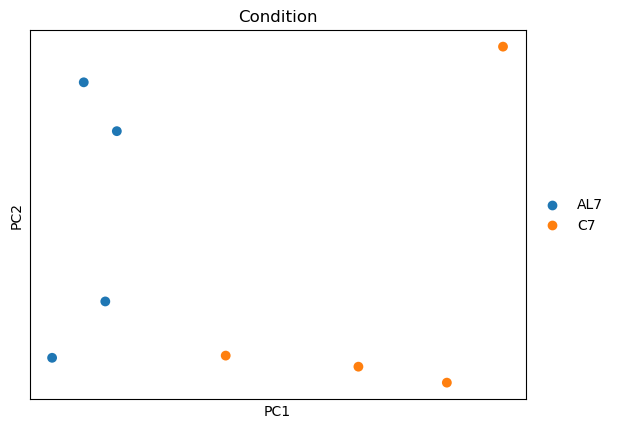

In [18]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [19]:
dds

AnnData object with n_obs × n_vars = 8 × 33753
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [20]:
stat_res = DeseqStats(dds, inference=inference, contrast = ('Condition','AL7','C7'))

In [21]:
stat_res.summary()

Running Wald tests...
... done in 6.79 seconds.



Log2 fold change & Wald test p-value: Condition AL7 vs C7
              baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
Geneid                                                                    
LOC100808170  0.472661        0.929324  1.742786  0.533240  0.593867   NaN
LOC102661143  0.690135        2.163636  1.537767  1.406999  0.159428   NaN
LOC100781438  2.466750       -0.452868  0.746450 -0.606695  0.544053   NaN
LOC100788220  2.146950        0.484924  0.827861  0.585755  0.558040   NaN
LOC100779643  3.073003        0.934287  0.780020  1.197774  0.231005   NaN
...                ...             ...       ...       ...       ...   ...
I638_mgp020   0.222280        0.207633  1.888974  0.109919  0.912474   NaN
I638_mgp019   0.269839       -0.444145  1.756362 -0.252878  0.800363   NaN
I638_mgp018   0.922729       -1.122636  1.293284 -0.868051  0.385366   NaN
I638_mgp014   0.077782       -0.513705  3.873560 -0.132618  0.894495   NaN
I638_mgp009   0.336556        0.908190  1.

In [22]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100808170,0.472661,0.929324,1.742786,0.533240,0.593867,NaN
LOC102661143,0.690135,2.163636,1.537767,1.406999,0.159428,NaN
LOC100781438,2.466750,-0.452868,0.746450,-0.606695,0.544053,NaN
LOC100788220,2.146950,0.484924,0.827861,0.585755,0.558040,NaN
LOC100779643,3.073003,0.934287,0.780020,1.197774,0.231005,NaN
...,...,...,...,...,...,...
I638_mgp020,0.222280,0.207633,1.888974,0.109919,0.912474,NaN
I638_mgp019,0.269839,-0.444145,1.756362,-0.252878,0.800363,NaN
I638_mgp018,0.922729,-1.122636,1.293284,-0.868051,0.385366,NaN


In [23]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC548054,31.247474,-0.939166,0.285676,-3.287518,0.001011,0.022502
LOC100800911,14.453323,1.391435,0.406456,3.423333,0.000619,0.016114
LOC100777515,375.319950,-0.848652,0.220929,-3.841287,0.000122,0.004566
LOC100305458,8.522294,-1.916484,0.596554,-3.212593,0.001315,0.027099
LOC100819045,17.979112,-1.354109,0.432520,-3.130744,0.001744,0.033115
...,...,...,...,...,...,...
LOC100814522,6.003916,2.540632,0.684935,3.709303,0.000208,0.006764
LOC100500140,13.424186,1.420312,0.413424,3.435484,0.000591,0.015514
LOC100805786,127.074411,-0.829017,0.250934,-3.303731,0.000954,0.021787


In [24]:
#Heatmap
import numpy as np
import seaborn as sns

In [25]:
dds

AnnData object with n_obs × n_vars = 8 × 33753
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [26]:
dds.layers['normed_counts']

array([[1.15567329, 1.15567329, 2.31134659, ..., 2.31134659, 0.        ,
        0.        ],
       [0.        , 0.        , 3.78376487, ..., 0.94594122, 0.        ,
        0.        ],
       [0.        , 0.        , 3.73351783, ..., 0.62225297, 0.62225297,
        0.        ],
       ...,
       [0.90156603, 0.90156603, 3.60626411, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.82841705, 2.74262557, ..., 0.        , 0.        ,
        0.91420852],
       [1.72404861, 0.        , 0.        , ..., 1.72404861, 0.        ,
        0.        ]])

In [27]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [28]:
dds.layers['log1p']

array([[0.76810311, 0.76810311, 1.19735493, ..., 1.19735493, 0.        ,
        0.        ],
       [0.        , 0.        , 1.56522787, ..., 0.66574578, 0.        ,
        0.        ],
       [0.        , 0.        , 1.55466865, ..., 0.48381591, 0.48381591,
        0.        ],
       ...,
       [0.64267777, 0.64267777, 1.52741714, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.03971721, 1.31978739, ..., 0.        , 0.        ,
        0.64930423],
       [1.00211923, 0.        , 0.        , ..., 1.00211923, 0.        ,
        0.        ]])

In [29]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC548054,31.247474,-0.939166,0.285676,-3.287518,0.001011,0.022502
LOC100800911,14.453323,1.391435,0.406456,3.423333,0.000619,0.016114
LOC100777515,375.319950,-0.848652,0.220929,-3.841287,0.000122,0.004566
LOC100305458,8.522294,-1.916484,0.596554,-3.212593,0.001315,0.027099
LOC100819045,17.979112,-1.354109,0.432520,-3.130744,0.001744,0.033115
...,...,...,...,...,...,...
LOC100814522,6.003916,2.540632,0.684935,3.709303,0.000208,0.006764
LOC100500140,13.424186,1.420312,0.413424,3.435484,0.000591,0.015514
LOC100805786,127.074411,-0.829017,0.250934,-3.303731,0.000954,0.021787


In [30]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 920
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [31]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

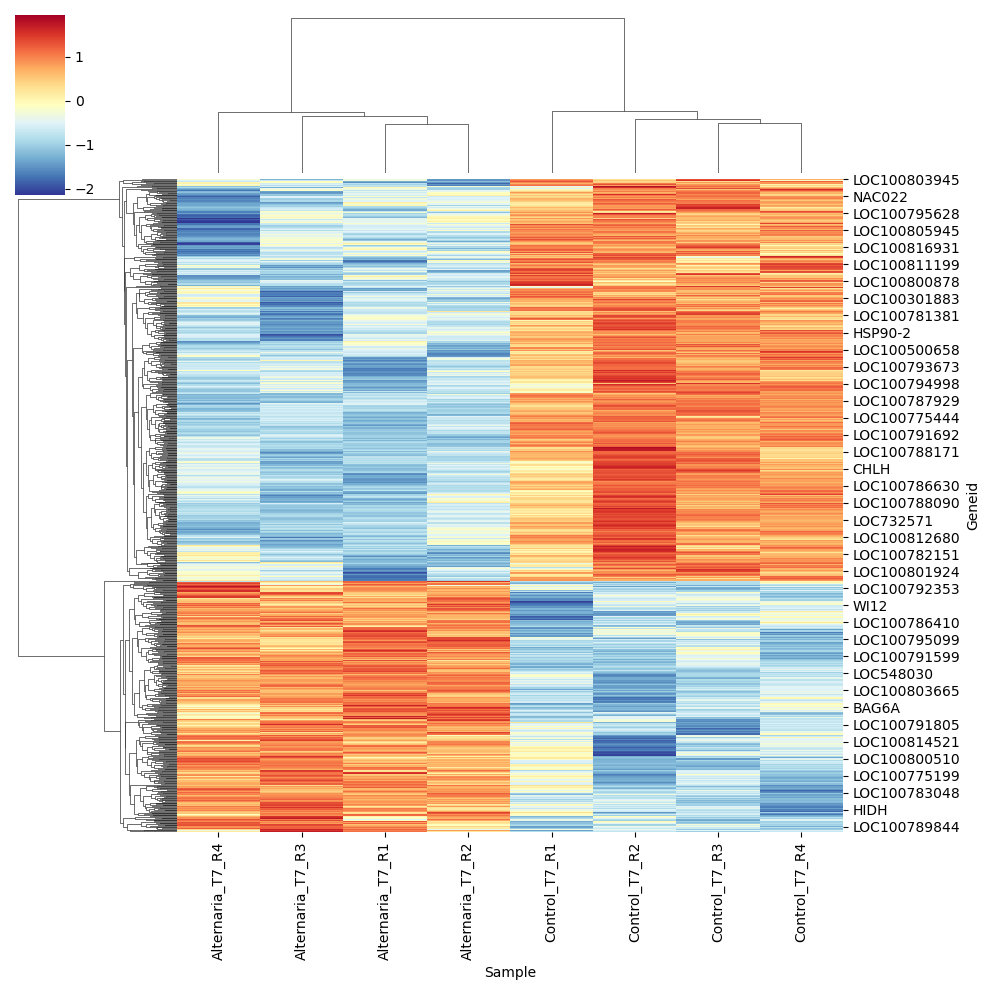

In [32]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
#Volcano

In [33]:
from bioinfokit import analys, visuz

In [34]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC548054,31.247474,-0.939166,0.285676,-3.287518,0.001011,0.022502
LOC100800911,14.453323,1.391435,0.406456,3.423333,0.000619,0.016114
LOC100777515,375.319950,-0.848652,0.220929,-3.841287,0.000122,0.004566
LOC100305458,8.522294,-1.916484,0.596554,-3.212593,0.001315,0.027099
LOC100819045,17.979112,-1.354109,0.432520,-3.130744,0.001744,0.033115
...,...,...,...,...,...,...
LOC100814522,6.003916,2.540632,0.684935,3.709303,0.000208,0.006764
LOC100500140,13.424186,1.420312,0.413424,3.435484,0.000591,0.015514
LOC100805786,127.074411,-0.829017,0.250934,-3.303731,0.000954,0.021787


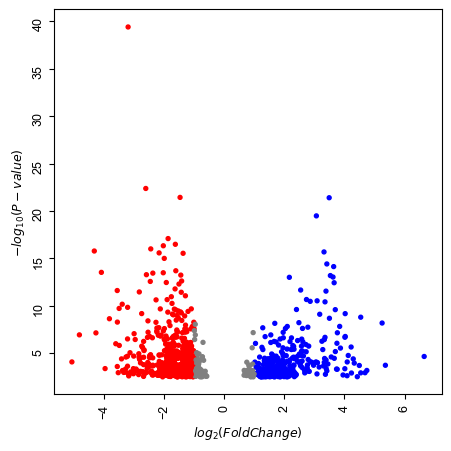

In [35]:
visuz.GeneExpression.volcano(df=sigs, lfc='log2FoldChange', pv='pvalue',
                             color=('blue','grey','red'), 
                             show=True)

In [36]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC548054,31.247474,-0.939166,0.285676,-3.287518,0.001011,0.022502
LOC100800911,14.453323,1.391435,0.406456,3.423333,0.000619,0.016114
LOC100777515,375.319950,-0.848652,0.220929,-3.841287,0.000122,0.004566
LOC100305458,8.522294,-1.916484,0.596554,-3.212593,0.001315,0.027099
LOC100819045,17.979112,-1.354109,0.432520,-3.130744,0.001744,0.033115
...,...,...,...,...,...,...
LOC100814522,6.003916,2.540632,0.684935,3.709303,0.000208,0.006764
LOC100500140,13.424186,1.420312,0.413424,3.435484,0.000591,0.015514
LOC100805786,127.074411,-0.829017,0.250934,-3.303731,0.000954,0.021787


In [37]:
sigs.to_csv('expressed_gene_7dpi.csv')